In [41]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt

## SIMULATION

In [82]:
table_results = []

In [83]:
for p_om in [.1, .2, .3, .4, .5]:
    robot_position = 0
    obj_position = np.random.choice(range(10,20))
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, 1-2*p_om, p_om])
    robot_mvmt_probs = np.array([1-1.5*p_om, 1.5*p_om])

    # strategy 1
    stg_1_times = []
    for sim_count in range(10000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += 1
            obj_position +=  np.random.choice(obj_mvmts, 1,p=obj_mvmt_probs)[0]
            time_count += 1
        robot_position = 0
        obj_position = np.random.choice(range(10,20))
        stg_1_times.append(time_count)
    print(sum(stg_1_times)/len(stg_1_times))
    table_results.append(['Stg_1', p_om,sum(stg_1_times) ])   

    # strategy 2
    stg_2_times = []
    for sim_count in range(10000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = np.random.choice(range(10,20))
        stg_2_times.append(time_count)
    print(sum(stg_2_times)/len(stg_2_times))
    table_results.append(['Stg_2', p_om,sum(stg_2_times) ])   
    
    # strategy 3
    stg_3_times = []
    for sim_count in range(10000):
        time_count = 0
        while robot_position < obj_position:
            obj_movement = np.random.choice([-1,0,1], 1,p=[p_om, 1-2*p_om, p_om])[0]
            obj_position += obj_movement
            robot_position += abs(obj_movement)
            time_count += 1
        robot_position = 0
        obj_position = np.random.choice(range(10,20))
        stg_3_times.append(time_count)
    print(sum(stg_3_times)/len(stg_3_times))
    table_results.append(['Stg_3', p_om,sum(stg_3_times) ])   
    


14.6042
96.7419
74.9603
14.676
48.9432
37.569
14.7276
32.7241
25.1017
14.9199
24.5996
18.828
14.9503
19.8819
15.0856


In [84]:
table_results = pd.DataFrame(table_results, columns= ['Strategy', 'P_OM', 'Total Time'])

In [85]:
table_results['Iterations'] = 10000

In [86]:
table_results['Exp'] = table_results['Total Time']/table_results['Iterations']

In [87]:
table_results.to_excel('sim_v1_results.xlsx')

In [88]:
table_results

,Strategy,P_OM,Total Time,Iterations,Exp
0,Stg_1,0.1,146042,10000,14.6042
1,Stg_2,0.1,967419,10000,96.7419
2,Stg_3,0.1,749603,10000,74.9603
3,Stg_1,0.2,146760,10000,14.6760
4,Stg_2,0.2,489432,10000,48.9432
5,Stg_3,0.2,375690,10000,37.5690
6,Stg_1,0.3,147276,10000,14.7276
7,Stg_2,0.3,327241,10000,32.7241
8,Stg_3,0.3,251017,10000,25.1017
9,Stg_1,0.4,149199,10000,14.9199


In [473]:
import numpy as np

# Final Expected Values for p = 0.1 to .5
final_exp_vals = []

for p in [.1, .2, .3, .4, .5]:
    bot_mvmts = np.array([0,1])
    fly_mvmts = np.array([-1,0,1])
    fly_mvmt_probs = np.array([p, 1-2*p, p])
    bot_mvmt_probs = np.array([1-1.5*p, 1.5*p])
    time_taken = []
    
    # Running Experiment for 10000 times, and averaging for expected values 
    for sim_count in range(10000):
        time_count = 0
        bot_position = 0
        
        # Randomly placing fly for d = 10 to d = 19
        fly_position = np.random.choice(range(10,20))
        while bot_position < fly_position:
            bot_position += np.random.choice(bot_mvmts, 1,p=bot_mvmt_probs)[0]
            fly_position +=  np.random.choice(fly_mvmts, 1,p=[p, 1-2*p, p])[0]
            time_count += 1
        time_taken.append(time_count)
    final_exp_vals.append(sum(time_taken)/len(time_taken))

KeyboardInterrupt: 

In [90]:
base_res2 = []
for p_om in np.linspace(.095, .495, 41):
    robot_position = 0
    obj_position = 1
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(10000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 1
        stg_2_base_times.append(time_count)
    base_res2.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


7.2829
6.8087
6.2403


KeyboardInterrupt: 

In [94]:
x = np.linspace(.01, .05, 11).tolist() + np.linspace(.05,.1,21).tolist() + np.linspace(.1, .2, 11).tolist() + np.linspace(.2, .5, 31).tolist()

In [69]:
base_res3 = []
for p_om in np.linspace(.01, .05, 11):
    robot_position = 0
    obj_position = 1
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(10000):
        time_count = 0
        while robot_position < obj_position: 
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 1
        stg_2_base_times.append(time_count)
    base_res3.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


27.0288
25.7932
24.5297
23.8139
23.3019
23.0928
21.9586
21.6803
20.4833
20.0055
19.5697
19.1728
18.3417
18.6477
17.6051
17.1382
16.7781
16.3506
16.0741
15.7288
15.3315


In [95]:
base_res4 = []
for p_om in x:
    robot_position = 0
    obj_position = 1
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(10000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 1
        stg_2_base_times.append(time_count)
    base_res4.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


69.0747
48.2279
36.6267
30.7884
26.3902
22.4377
20.2855
17.9943
16.2694
14.7469
13.6319
13.8213
12.7694
12.2866
12.1469
11.4772
11.1316
10.8705
10.3668
9.8926
9.7379
9.4266
9.0722
8.8942
8.507
8.3322
7.9229
7.7295
7.6295
7.5155
7.2607
7.2382
6.9738
6.5332
6.1498
5.6042
5.2891
4.9328
4.741
4.3189
4.1655
4.0393
3.8195
3.8555
3.7023
3.5639
3.3516
3.3058
3.2518
3.1351
3.045
2.9414
2.8791
2.7802
2.6724
2.7146
2.6092
2.5835
2.4877
2.5182
2.4437
2.4232
2.3257
2.3302
2.3272
2.2493
2.2536
2.2515
2.2847
2.2104
2.2543
2.2212
2.1942
2.1669


In [113]:
base_res = []
for p_om in [.1,.2,.3,.4,.5]:
    robot_position = 0
    obj_position = 1
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(100000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 1
        stg_2_base_times.append(time_count)
    base_res.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


7.07761
3.8554
2.78821
2.34404
2.18355


In [136]:
# base_res = []
# for p_om in [.1,.2,.3,.4,.5]:
for p_om in [.1]:
    robot_position = 0
    obj_position = 2
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(100000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 2
        stg_2_base_times.append(time_count)
#     base_res.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


13.76862


In [137]:
# base_res = []
# for p_om in [.1,.2,.3,.4,.5]:
for p_om in [.1]:
    robot_position = 0
    obj_position = 2
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(100000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 3
        stg_2_base_times.append(time_count)
#     base_res.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


20.36227


In [140]:
# base_res = []
# for p_om in [.1,.2,.3,.4,.5]:
for p_om in [.1]:
    robot_position = 0
    obj_position = 7
    robot_mvmts = np.array([0,1])
    obj_mvmts = np.array([-1,0,1])
    obj_mvmt_probs = np.array([p_om, (1-2*p_om), p_om])
    robot_mvmt_probs = np.array([1-(1.5*p_om), 1.5*p_om])
    stg_2_base_times = []
    for sim_count in range(100000):
        time_count = 0
        while robot_position < obj_position:
            robot_position += np.random.choice(robot_mvmts, 1,p=robot_mvmt_probs)[0]
            obj_position +=  np.random.choice(obj_mvmts, 1,p=[p_om, 1-2*p_om, p_om])[0]
            time_count += 1
        robot_position = 0
        obj_position = 7
        stg_2_base_times.append(time_count)
#     base_res.append(sum(stg_2_base_times)/len(stg_2_base_times))
    print(sum(stg_2_base_times)/len(stg_2_base_times))
#     table_results.append(['stg_2_base', p_om,sum(stg_2_base_times) ])


KeyboardInterrupt: 

In [120]:
t_1 = .5
(2/(3*t_1)) + .5

1.8333333333333333

In [149]:
y

array([69.0747, 48.2279, 36.6267, 30.7884, 26.3902, 22.4377, 20.2855,
       17.9943, 16.2694, 14.7469, 13.6319, 13.8213, 12.7694, 12.2866,
       12.1469, 11.4772, 11.1316, 10.8705, 10.3668,  9.8926,  9.7379,
        9.4266,  9.0722,  8.8942,  8.507 ,  8.3322,  7.9229,  7.7295,
        7.6295,  7.5155,  7.2607,  7.2382,  6.9738,  6.5332,  6.1498,
        5.6042,  5.2891,  4.9328,  4.741 ,  4.3189,  4.1655,  4.0393,
        3.8195,  3.8555,  3.7023,  3.5639,  3.3516,  3.3058,  3.2518,
        3.1351,  3.045 ,  2.9414,  2.8791,  2.7802,  2.6724,  2.7146,
        2.6092,  2.5835,  2.4877,  2.5182,  2.4437,  2.4232,  2.3257,
        2.3302,  2.3272,  2.2493,  2.2536,  2.2515,  2.2847,  2.2104,
        2.2543,  2.2212,  2.1942,  2.1669])

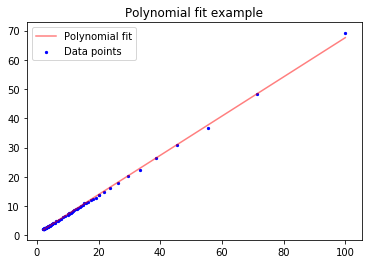

(0.6709997962925215, 0.49285147772241666)

In [99]:
# x = np.linspace(.1, .5, 41)
# x = np.array([1/i for i in np.linspace(.05, .09, 21)])
x_2 = np.array([1/i for i in x])
y = np.array(base_res4)
fit = np.polyfit(x_2, y, 1)
a = fit[0]
b = fit[1]
# c = fit[2]
# fit_equation = a * np.square(x) + b * x + c
fit_equation = a*x_2 + b 
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x_2, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x_2, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

In [151]:
x

array([0.01  , 0.014 , 0.018 , 0.022 , 0.026 , 0.03  , 0.034 , 0.038 ,
       0.042 , 0.046 , 0.05  , 0.05  , 0.0525, 0.055 , 0.0575, 0.06  ,
       0.0625, 0.065 , 0.0675, 0.07  , 0.0725, 0.075 , 0.0775, 0.08  ,
       0.0825, 0.085 , 0.0875, 0.09  , 0.0925, 0.095 , 0.0975, 0.1   ,
       0.1   , 0.11  , 0.12  , 0.13  , 0.14  , 0.15  , 0.16  , 0.17  ,
       0.18  , 0.19  , 0.2   , 0.2   , 0.21  , 0.22  , 0.23  , 0.24  ,
       0.25  , 0.26  , 0.27  , 0.28  , 0.29  , 0.3   , 0.31  , 0.32  ,
       0.33  , 0.34  , 0.35  , 0.36  , 0.37  , 0.38  , 0.39  , 0.4   ,
       0.41  , 0.42  , 0.43  , 0.44  , 0.45  , 0.46  , 0.47  , 0.48  ,
       0.49  , 0.5   ])

In [485]:
fit_2 = (1/(1.5*x*(1-x)))

In [486]:
y

array([69.0747, 48.2279, 36.6267, 30.7884, 26.3902, 22.4377, 20.2855,
       17.9943, 16.2694, 14.7469, 13.6319, 13.8213, 12.7694, 12.2866,
       12.1469, 11.4772, 11.1316, 10.8705, 10.3668,  9.8926,  9.7379,
        9.4266,  9.0722,  8.8942,  8.507 ,  8.3322,  7.9229,  7.7295,
        7.6295,  7.5155,  7.2607,  7.2382,  6.9738,  6.5332,  6.1498,
        5.6042,  5.2891,  4.9328,  4.741 ,  4.3189,  4.1655,  4.0393,
        3.8195,  3.8555,  3.7023,  3.5639,  3.3516,  3.3058,  3.2518,
        3.1351,  3.045 ,  2.9414,  2.8791,  2.7802,  2.6724,  2.7146,
        2.6092,  2.5835,  2.4877,  2.5182,  2.4437,  2.4232,  2.3257,
        2.3302,  2.3272,  2.2493,  2.2536,  2.2515,  2.2847,  2.2104,
        2.2543,  2.2212,  2.1942,  2.1669])

In [487]:
fit_equation

array([67.16666667, 48.11904762, 37.53703704, 30.8030303 , 26.14102564,
       22.72222222, 20.10784314, 18.04385965, 16.37301587, 14.99275362,
       13.83333333, 13.83333333, 13.1984127 , 12.62121212, 12.0942029 ,
       11.61111111, 11.16666667, 10.75641026, 10.37654321, 10.02380952,
        9.6954023 ,  9.38888889,  9.10215054,  8.83333333,  8.58080808,
        8.34313725,  8.11904762,  7.90740741,  7.70720721,  7.51754386,
        7.33760684,  7.16666667,  7.16666667,  6.56060606,  6.05555556,
        5.62820513,  5.26190476,  4.94444444,  4.66666667,  4.42156863,
        4.2037037 ,  4.00877193,  3.83333333,  3.83333333,  3.67460317,
        3.53030303,  3.39855072,  3.27777778,  3.16666667,  3.06410256,
        2.9691358 ,  2.88095238,  2.79885057,  2.72222222,  2.65053763,
        2.58333333,  2.52020202,  2.46078431,  2.4047619 ,  2.35185185,
        2.3018018 ,  2.25438596,  2.20940171,  2.16666667,  2.12601626,
        2.08730159,  2.0503876 ,  2.01515152,  1.98148148,  1.94

In [488]:
fit_2

array([67.34006734, 48.29518014, 37.71592366, 30.98469356, 26.32548834,
       22.90950745, 20.29797426, 18.23686034, 16.5689101 , 15.19156564,
       14.03508772, 14.03508772, 13.40201868, 12.82667949, 12.30154154,
       11.82033097, 11.37777778, 10.96942273, 10.59146725, 10.2406554 ,
        9.91418038,  9.60960961,  9.32482443,  9.05797101,  8.80742025,
        8.5717347 ,  8.34964123,  8.14000814,  7.94182612,  7.75419211,
        7.57629566,  7.40740741,  7.40740741,  6.80966973,  6.31313131,
        5.89448865,  5.53709856,  5.22875817,  4.96031746,  4.72478148,
        4.51671183,  4.3318172 ,  4.16666667,  4.16666667,  4.01848503,
        3.88500389,  3.76435159,  3.65497076,  3.55555556,  3.46500347,
        3.38237781,  3.30687831,  3.23781771,  3.17460317,  3.11672121,
        3.06372549,  3.0152269 ,  2.97088532,  2.93040293,  2.89351852,
        2.86000286,  2.82965478,  2.80229788,  2.77777778,  2.75595976,
        2.73672687,  2.71997824,  2.70562771,  2.69360269,  2.68

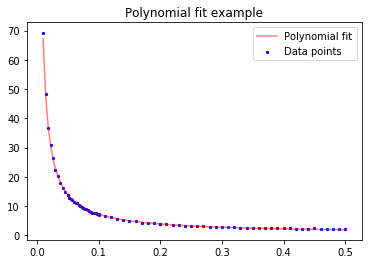

(0.6666666666666666, 0.5)

In [111]:
a,b = 2/3,0.5
fit_equation = a*x_2 + b
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

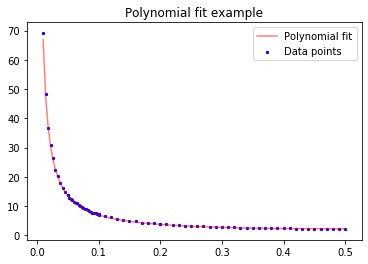

(0.6666666666666666, 0.5)

In [169]:
# a,b = 2/3,0.5
# fit_equation = a*x_2 + b
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_2,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

In [479]:
plt.rcParams.update({'font.size': 22})

In [482]:
y

array([69.0747, 48.2279, 36.6267, 30.7884, 26.3902, 22.4377, 20.2855,
       17.9943, 16.2694, 14.7469, 13.6319, 13.8213, 12.7694, 12.2866,
       12.1469, 11.4772, 11.1316, 10.8705, 10.3668,  9.8926,  9.7379,
        9.4266,  9.0722,  8.8942,  8.507 ,  8.3322,  7.9229,  7.7295,
        7.6295,  7.5155,  7.2607,  7.2382,  6.9738,  6.5332,  6.1498,
        5.6042,  5.2891,  4.9328,  4.741 ,  4.3189,  4.1655,  4.0393,
        3.8195,  3.8555,  3.7023,  3.5639,  3.3516,  3.3058,  3.2518,
        3.1351,  3.045 ,  2.9414,  2.8791,  2.7802,  2.6724,  2.7146,
        2.6092,  2.5835,  2.4877,  2.5182,  2.4437,  2.4232,  2.3257,
        2.3302,  2.3272,  2.2493,  2.2536,  2.2515,  2.2847,  2.2104,
        2.2543,  2.2212,  2.1942,  2.1669])

In [483]:
x

array([0.01  , 0.014 , 0.018 , 0.022 , 0.026 , 0.03  , 0.034 , 0.038 ,
       0.042 , 0.046 , 0.05  , 0.05  , 0.0525, 0.055 , 0.0575, 0.06  ,
       0.0625, 0.065 , 0.0675, 0.07  , 0.0725, 0.075 , 0.0775, 0.08  ,
       0.0825, 0.085 , 0.0875, 0.09  , 0.0925, 0.095 , 0.0975, 0.1   ,
       0.1   , 0.11  , 0.12  , 0.13  , 0.14  , 0.15  , 0.16  , 0.17  ,
       0.18  , 0.19  , 0.2   , 0.2   , 0.21  , 0.22  , 0.23  , 0.24  ,
       0.25  , 0.26  , 0.27  , 0.28  , 0.29  , 0.3   , 0.31  , 0.32  ,
       0.33  , 0.34  , 0.35  , 0.36  , 0.37  , 0.38  , 0.39  , 0.4   ,
       0.41  , 0.42  , 0.43  , 0.44  , 0.45  , 0.46  , 0.47  , 0.48  ,
       0.49  , 0.5   ])

In [484]:
fit_2

array([66.84006734, 47.79518014, 37.21592366, 30.48469356, 25.82548834,
       22.40950745, 19.79797426, 17.73686034, 16.0689101 , 14.69156564,
       13.53508772, 13.53508772, 12.90201868, 12.32667949, 11.80154154,
       11.32033097, 10.87777778, 10.46942273, 10.09146725,  9.7406554 ,
        9.41418038,  9.10960961,  8.82482443,  8.55797101,  8.30742025,
        8.0717347 ,  7.84964123,  7.64000814,  7.44182612,  7.25419211,
        7.07629566,  6.90740741,  6.90740741,  6.30966973,  5.81313131,
        5.39448865,  5.03709856,  4.72875817,  4.46031746,  4.22478148,
        4.01671183,  3.8318172 ,  3.66666667,  3.66666667,  3.51848503,
        3.38500389,  3.26435159,  3.15497076,  3.05555556,  2.96500347,
        2.88237781,  2.80687831,  2.73781771,  2.67460317,  2.61672121,
        2.56372549,  2.5152269 ,  2.47088532,  2.43040293,  2.39351852,
        2.36000286,  2.32965478,  2.30229788,  2.27777778,  2.25595976,
        2.23672687,  2.21997824,  2.20562771,  2.19360269,  2.18

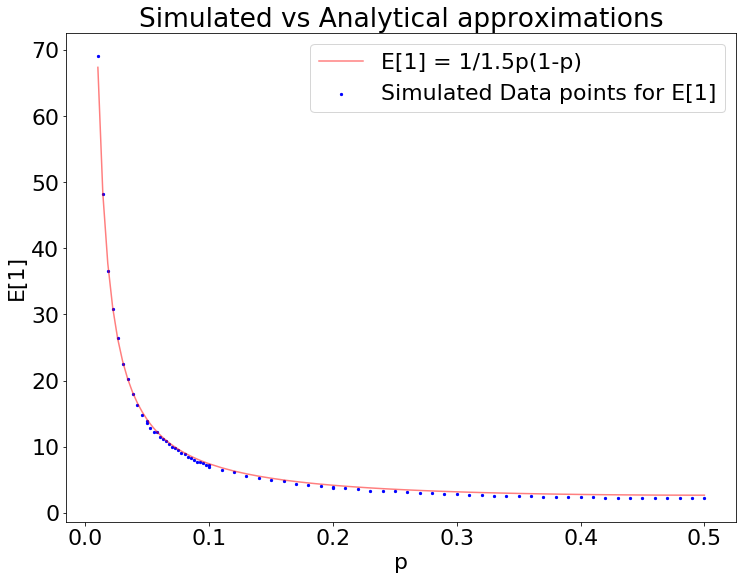

(0.6666666666666666, 0.5)

In [489]:
# a,b = 2/3,0.5
# fit_equation = a*x_2 + b
fig1 = plt.figure(figsize=(12,9))
ax1 = fig1.subplots()
ax1.plot(x, fit_2,color = 'r',alpha = 0.5, label = 'E[1] = 1/1.5p(1-p)')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Simulated Data points for E[1]')
ax1.set_title('Simulated vs Analytical approximations')
ax1.set_xlabel('p')
ax1.set_ylabel('E[1]')
ax1.legend()
plt.show()
a,b

In [109]:
((2/3)*(1/0.014) ) + .5

48.11904761904762

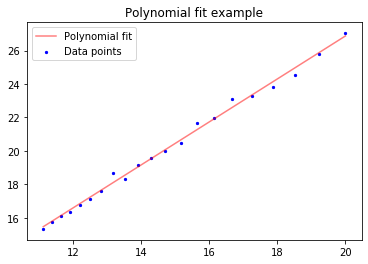

(1.2837644248954942, 1.1956032973068975)

In [70]:
# x = np.linspace(.1, .5, 41)
x = np.array([1/i for i in np.linspace(.05, .09, 21)])
y = np.array(base_res3)
fit = np.polyfit(x, y, 1)
a = fit[0]
b = fit[1]
# c = fit[2]
# fit_equation = a * np.square(x) + b * x + c
fit_equation = a*x + b 
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

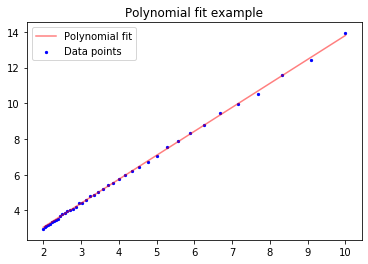

(1.3430062105453104, 0.3735200551703775)

In [66]:
# x = np.linspace(.1, .5, 41)
x = np.array([1/i for i in np.linspace(.1, .5, 41)])
y = np.array(base_res)
fit = np.polyfit(x, y, 1)
a = fit[0]
b = fit[1]
# c = fit[2]
# fit_equation = a * np.square(x) + b * x + c
fit_equation = a*x + b 
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

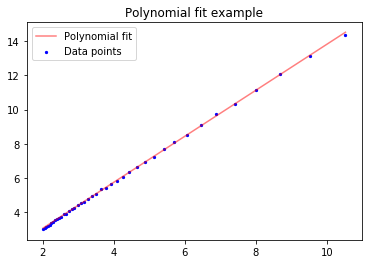

(1.3431697260996756, 0.37691884925629016)

In [64]:
# x = np.linspace(.1, .5, 41)
x = np.array([1/i for i in np.linspace(.095, .495, 41)])
y = np.array(base_res2)
fit = np.polyfit(x, y, 1)
a = fit[0]
b = fit[1]
# c = fit[2]
# fit_equation = a * np.square(x) + b * x + c
fit_equation = a*x + b 
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

(1.3431697260996756, 0.37691884925629016)

In [72]:
a,b = 4/3, 0

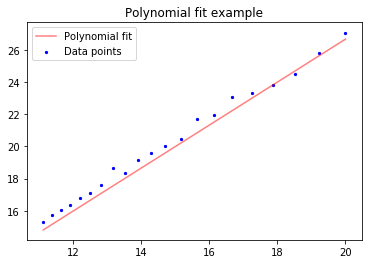

(1.3333333333333333, 0)

In [75]:
fit_equation = a*x + b 
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()
a,b

## RECURSION (using for loop instead with iterative n)

In [366]:
rec_results = pd.DataFrame()

In [364]:
# Strategy 1
stg_1_anly = []
for p_om in [.1,.2,.3,.4,.5]:
    exp_val_1 = [1/(1-p_om), (2-3*p_om)/((1-p_om)*(1-p_om))]
#     exp_val_1 = [1.11, 2,3.1]

    for n in range(3,20):
        e_t = (p_om + (1-2*p_om)*(1+ exp_val_1[-1]) + p_om*(1+ exp_val_1[-2]))/(1-p_om)
        exp_val_1.append(e_t)

    expected_total = 0
    for d in range(10,20):
        expected_total += 0.1* exp_val_1[d-1]
    stg_1_anly.append(['Stg_1',p_om,expected_total])
    print(expected_total)

14.59999999999742
14.699999984741225
14.79999561104987
14.89959102076986
15.000000000000002


In [406]:
pd.DataFrame(stg_1_anly, columns= ['ST','P_om', 'Expected Value']).to_clipboard()

In [133]:
exp_val_1

[1.1111111111111112,
 2.0987654320987654,
 3.1001371742112487,
 4.099984758420973,
 5.100001693508781,
 6.099999811832357,
 7.100000020907515,
 8.099999997676942,
 9.100000000258119,
 10.099999999971319,
 11.100000000003186,
 12.099999999999646,
 13.10000000000004,
 14.099999999999998,
 15.100000000000001,
 16.1,
 17.1,
 18.1,
 19.1]

In [146]:
# Strategy 3
# p_om = 0.1
for p_om in [.1,.2,.3,.4,.5]:
    exp_val_3 = [1/(p_om), 1/(p_om) ]
    for n in range(3,20):
        e_t = (1 + (p_om)*(exp_val_3[-2]))/(p_om)
        exp_val_3.append(e_t)

    expected_total = 0
    for d in range(10,20):
        expected_total += 0.1*exp_val_3[d-1]

    print(expected_total)

75.0
37.5
25.0
18.75
15.000000000000002


In [358]:
9/30

0.3

In [468]:
for n,p_om in enumerate([.1,.2,.3,.4,.5]):
    q_m = 1.5 * p_om
    e1 = 1/(q_m*(1-p_om)) - p_error_terms[]
    # e1 = 2.3497542908541056

    # e1 = 1/(q_m*(1-p_om)) -(9/31)

    e2 = (1 +(3*p_om*q_m - 2*p_om -q_m)*e1)/(p_om*(q_m-1)) 
    e3 = (1 +(3*p_om*q_m - 2*p_om -q_m)*e2 + (p_om + q_m -3*p_om*q_m)*e1)/(p_om*(q_m-1))
    e1,e2,e3

    # Strategy 2
    #     p_om = 0.1
    #     q_m = 1.5 * p_om
    exp_val_2 = [e1,e2,e3]
    for n in range(4,50):
        e_t = (1 +(3*p_om*q_m - 2*p_om - q_m)*exp_val_2[-1] + (p_om + q_m -3*p_om*q_m)*exp_val_2[-2] + (p_om*q_m)*exp_val_2[-3])/(p_om*(q_m-1))
        exp_val_2.append(e_t)

    expected_total = 0
    for d in range(10,20):
        expected_total += 0.1* exp_val_2[d-1]

    print(expected_total)

24.651172799029073


In [467]:
e1,e2,e3


(2.3497542908541056, 3.736455736129949, 5.5178668695576)

In [374]:
1/(q_m*(1-p_om))

7.407407407407406

In [377]:
list(range(9,-1,-1))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [446]:
p_set_1 = [.0000000001] + np.linspace(.0001,0.001,10).tolist() + np.linspace(.001,0.01,16).tolist()[1:] + np.linspace(.01,0.4,81).tolist()[1:] + np.linspace(.4,0.5,101).tolist()[1:] 

In [447]:
p_set_1

[1e-10,
 0.0001,
 0.00019999999999999998,
 0.0003,
 0.00039999999999999996,
 0.0005,
 0.0006000000000000001,
 0.0007,
 0.0007999999999999999,
 0.0009,
 0.001,
 0.0016,
 0.0022,
 0.0028000000000000004,
 0.0034000000000000002,
 0.004,
 0.0046,
 0.005200000000000001,
 0.0058000000000000005,
 0.0064,
 0.007,
 0.007600000000000001,
 0.0082,
 0.0088,
 0.009400000000000002,
 0.01,
 0.014875,
 0.01975,
 0.024625,
 0.0295,
 0.034375,
 0.03925,
 0.044125000000000004,
 0.049,
 0.053875,
 0.058750000000000004,
 0.063625,
 0.06849999999999999,
 0.073375,
 0.07825,
 0.08312499999999999,
 0.088,
 0.092875,
 0.09774999999999999,
 0.102625,
 0.1075,
 0.11237499999999999,
 0.11725,
 0.122125,
 0.127,
 0.131875,
 0.13675,
 0.141625,
 0.14650000000000002,
 0.151375,
 0.15625,
 0.16112500000000002,
 0.166,
 0.170875,
 0.17575000000000002,
 0.180625,
 0.1855,
 0.19037500000000002,
 0.19525,
 0.200125,
 0.20500000000000002,
 0.209875,
 0.21475,
 0.21962500000000001,
 0.2245,
 0.229375,
 0.23425,
 0.239125,
 

In [494]:
p_error_terms = []
for p_om in np.linspace(.00001,.66666, 1000):
    q_m = 1.5*p_om
    error_term = 0
    for nth_place in range(1,20):
        next_it = True
        for var_term in range(9,-1,-1):
            if next_it:
                e1 = 1/(q_m*(1-p_om)) - (error_term + var_term/(10**(nth_place)))
                e2 = (1 +(3*p_om*q_m - 2*p_om -q_m)*e1)/(p_om*(q_m-1))
                e3 = (1 +(3*p_om*q_m - 2*p_om -q_m)*e2 + \
                      (p_om + q_m -3*p_om*q_m)*e1)/(p_om*(q_m-1))
                exp_val_2 = [e1,e2,e3]
                for n in range(4,50):
                    e_t = (1 +(3*p_om*q_m - 2*p_om - q_m)*exp_val_2[-1] \
                           + (p_om + q_m -3*p_om*q_m)*exp_val_2[-2] \
                           + (p_om*q_m)*exp_val_2[-3])/(p_om*(q_m-1))
                    exp_val_2.append(e_t)
                if exp_val_2[-1] > 0:
                    error_term += var_term/(10**(nth_place))
                    next_it = False
    p_error_terms.append(error_term)

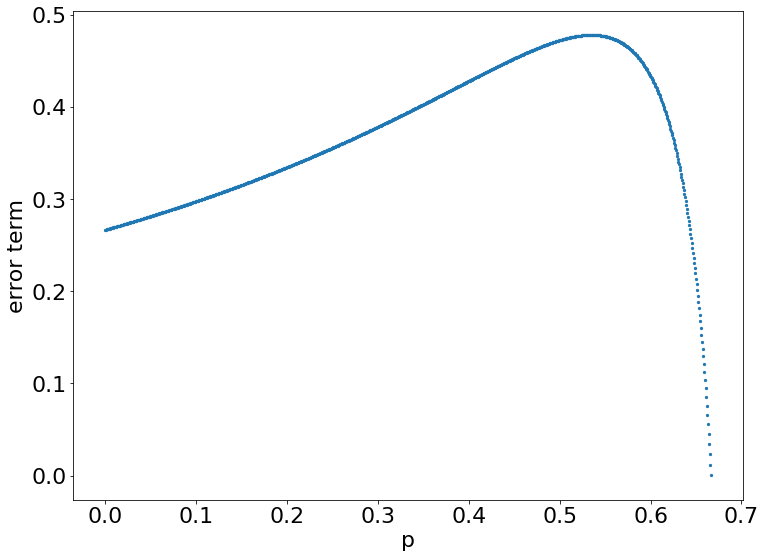

In [496]:
plt.figure(figsize=(12,9))
plt.xlabel('p')
plt.ylabel('error term')
plt.scatter(x = np.linspace(.00001,.66666, 1000), y= p_error_terms, s = 5)

In [404]:
error_term

0.29757720645024804

In [462]:
max(p_error_terms)

0.47804502324342407